# Breast Cancer Prediction

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [67]:
dataset = pd.read_csv("data.csv")

In [68]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
dataset.shape

(569, 33)

In [70]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


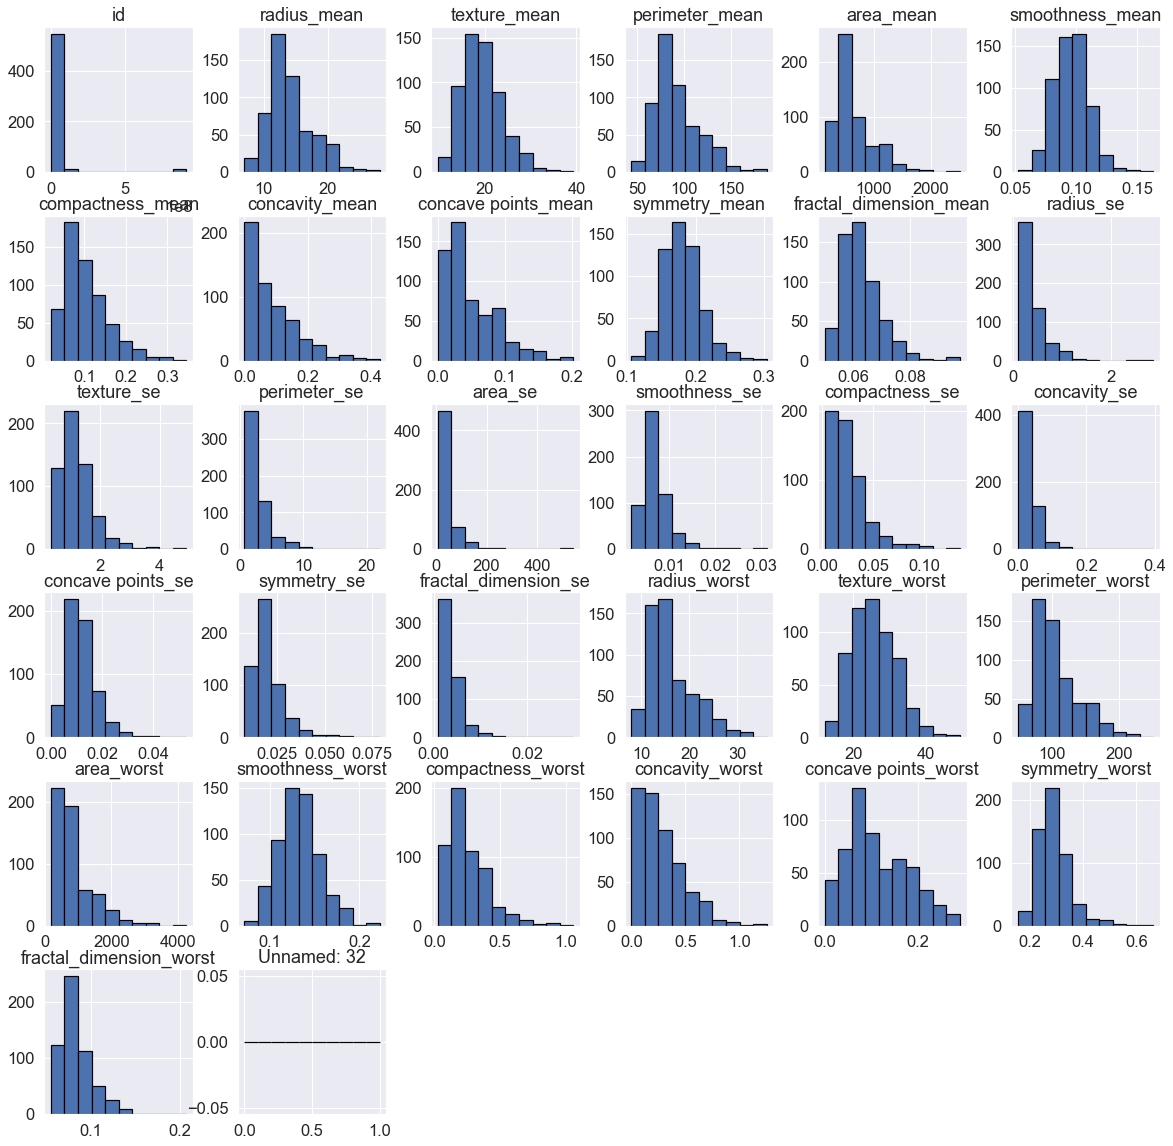

In [71]:
sns.set(font_scale=1.5)
dataset.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [73]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [74]:
dataset['diagnosis'].value_counts()
# the number of maginant-M and benign-B

B    357
M    212
Name: diagnosis, dtype: int64

c:\users\rutuja\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

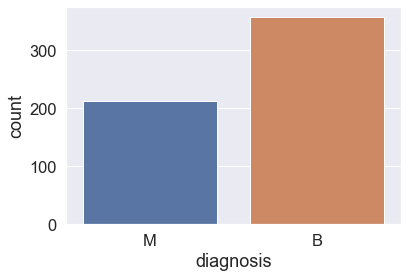

In [75]:
sns.countplot(dataset['diagnosis'],label="count")

In [76]:
# Convert the value of M and B into 1 and 0
from sklearn.preprocessing import LabelEncoder
y_labelencoder = LabelEncoder()
dataset.iloc[:,1] = y_labelencoder.fit_transform(dataset.iloc[:,1].values)

In [77]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


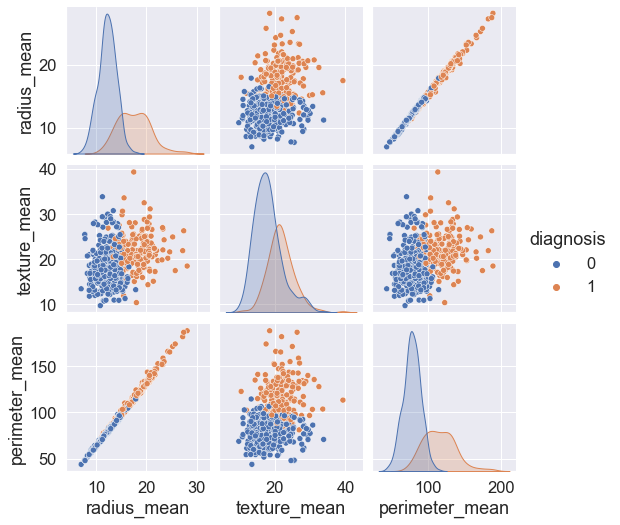

In [78]:
sns.pairplot(dataset.iloc[:,1:5],hue="diagnosis")

In [79]:
# get the correlation
dataset.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

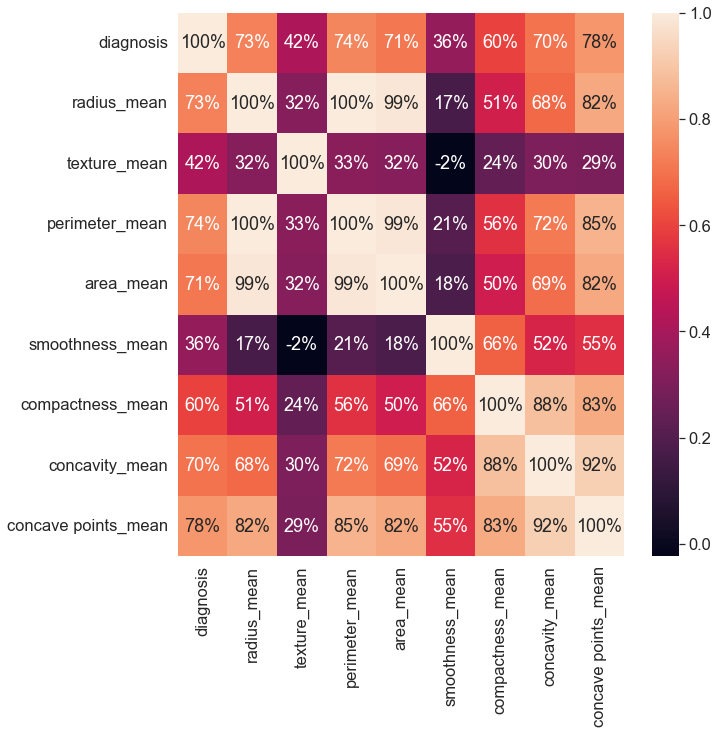

In [80]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(dataset.iloc[:,1:10].corr(),annot=True,fmt=".0%")

In [81]:
# Split dataset into dependent and independent variables
x = dataset.iloc[:,2:3].values
y = dataset.iloc[:,1].values

In [82]:
x

array([[17.99 ],
       [20.57 ],
       [19.69 ],
       [11.42 ],
       [20.29 ],
       [12.45 ],
       [18.25 ],
       [13.71 ],
       [13.   ],
       [12.46 ],
       [16.02 ],
       [15.78 ],
       [19.17 ],
       [15.85 ],
       [13.73 ],
       [14.54 ],
       [14.68 ],
       [16.13 ],
       [19.81 ],
       [13.54 ],
       [13.08 ],
       [ 9.504],
       [15.34 ],
       [21.16 ],
       [16.65 ],
       [17.14 ],
       [14.58 ],
       [18.61 ],
       [15.3  ],
       [17.57 ],
       [18.63 ],
       [11.84 ],
       [17.02 ],
       [19.27 ],
       [16.13 ],
       [16.74 ],
       [14.25 ],
       [13.03 ],
       [14.99 ],
       [13.48 ],
       [13.44 ],
       [10.95 ],
       [19.07 ],
       [13.28 ],
       [13.17 ],
       [18.65 ],
       [ 8.196],
       [13.17 ],
       [12.05 ],
       [13.49 ],
       [11.76 ],
       [13.64 ],
       [11.94 ],
       [18.22 ],
       [15.1  ],
       [11.52 ],
       [19.21 ],
       [14.71 ],
       [13.05 

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [84]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [85]:
def models(x_train,y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train,y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state = 0, criterion="entropy")
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state = 0,criterion="entropy", n_estimators = 10)
    forest.fit(x_train, y_train)
    
    print('[0]Logistic Regrssion Accuracy:', log.score(x_train, y_train))
    print('[1]Decision tree Accuracy:', tree.score(x_train, y_train))
    print('[2]Random forest Accuracy:', forest.score(x_train, y_train))

    return log,tree,forest

In [86]:
model = models(x_train,y_train)

[0]Logistic Regrssion Accuracy: 0.8791208791208791
[1]Decision tree Accuracy: 0.9604395604395605
[2]Random forest Accuracy: 0.9560439560439561


In [87]:
# testing my models 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(y_test, model[i].predict(x_test)))
    print("Accuracy :",accuracy_score(y_test,model[i].predict(x_test)))

Model 0
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        67
           1       0.91      0.83      0.87        47

    accuracy                           0.89       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.89      0.89       114

Accuracy : 0.8947368421052632
Model 1
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        67
           1       0.83      0.72      0.77        47

    accuracy                           0.82       114
   macro avg       0.83      0.81      0.81       114
weighted avg       0.82      0.82      0.82       114

Accuracy : 0.8245614035087719
Model 2
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        67
           1       0.81      0.72      0.76        47

    accuracy                           0.82       114
   macro avg       0.81      0.80      0.81 

In [90]:
prediction = model[2].predict(x_test)
print(f"Predicted Values - \n{prediction}")
print(f"Actual Values - \n{y_test}")

Predicted Values - 
[0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1
 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 0]
Actual Values - 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [92]:
# dumping our model
from joblib import dump
dump(model[2],"Breast_Cancer_Prediction.joblib")

['Breast_Cancer_Prediction.joblib']